In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
X, y = make_moons(100, noise=0.25,random_state=2)

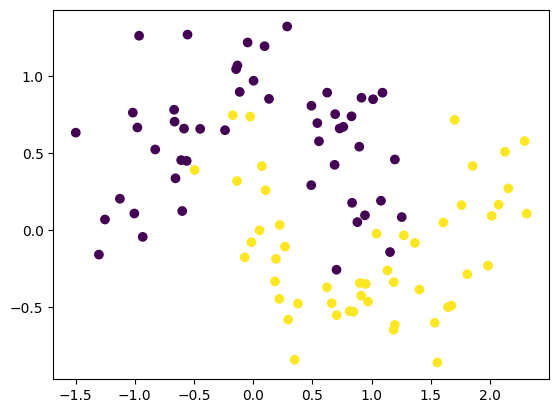

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [22]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=True)

Epoch 1/2000
3/3 [==============================] - 1s 104ms/step - loss: 0.6389 - accuracy: 0.4625 - val_loss: 0.3898 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 12ms/step - loss: 0.4152 - accuracy: 0.8500 - val_loss: 0.2077 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.3938 - accuracy: 0.8125 - val_loss: 0.2222 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.3864 - accuracy: 0.8375 - val_loss: 0.2429 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.3527 - accuracy: 0.8375 - val_loss: 0.2106 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 15ms/step - loss: 0.3616 - accuracy: 0.8375 - val_loss: 0.2269 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.3584 - accuracy: 0.8500 - val_loss: 0.2389 - val_accuracy: 0.9000
Epoch 8/2000

9600/9600 [==============================] - 8s 858us/step


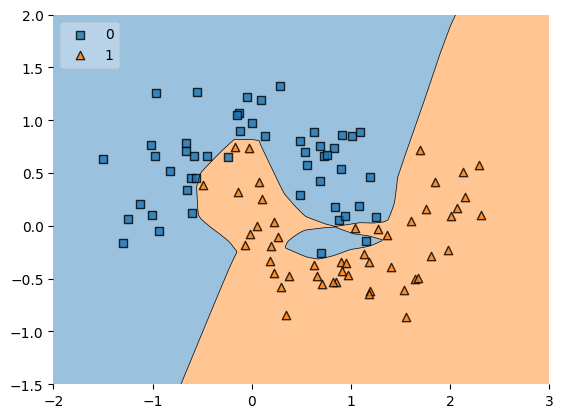

In [24]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

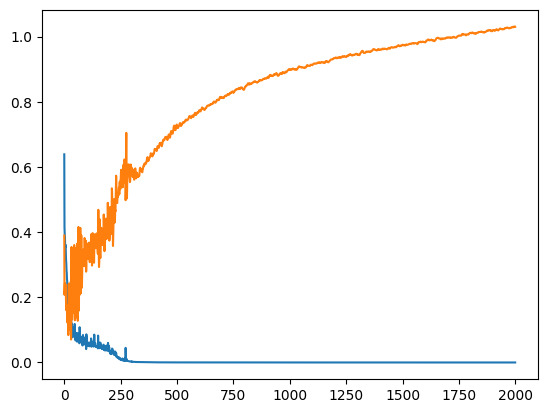

In [25]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [26]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 9s 912us/step


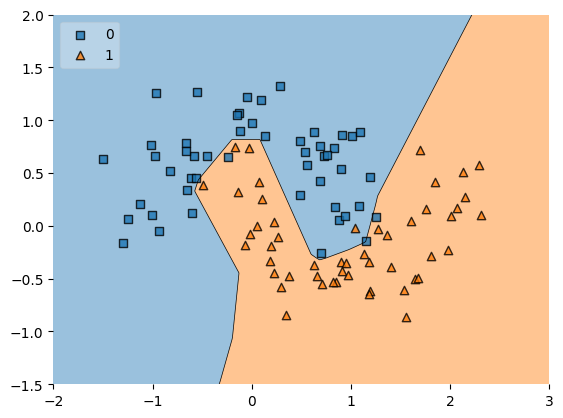

In [28]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

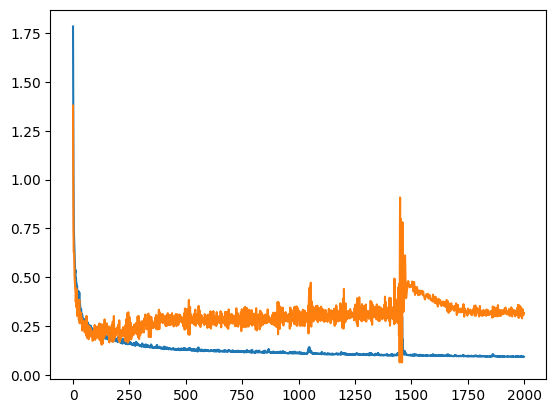

In [29]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [30]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

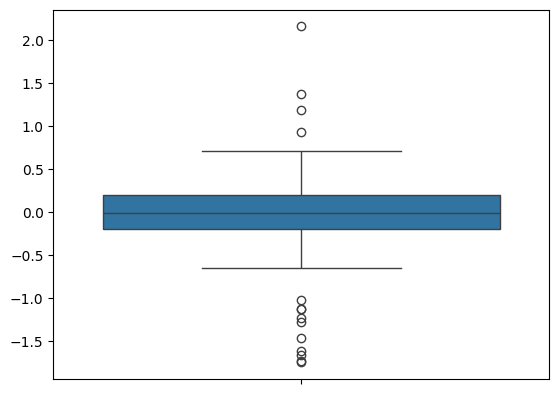

In [31]:
sns.boxplot(model1_weight_layer1)

<Axes: >

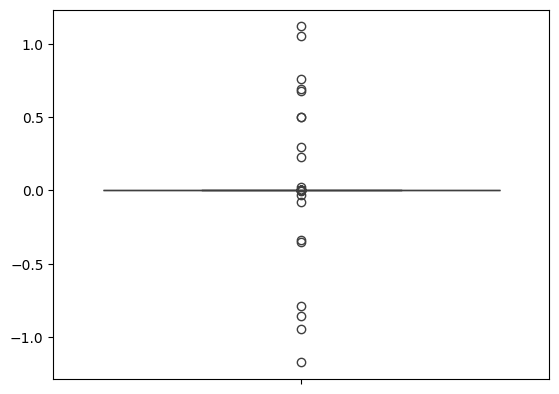

In [32]:
sns.boxplot(model2_weight_layer1)

In [33]:
model1_weight_layer1.min()

-1.7461712

In [34]:
model2_weight_layer1.min()

-1.1706053

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14704\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14704\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

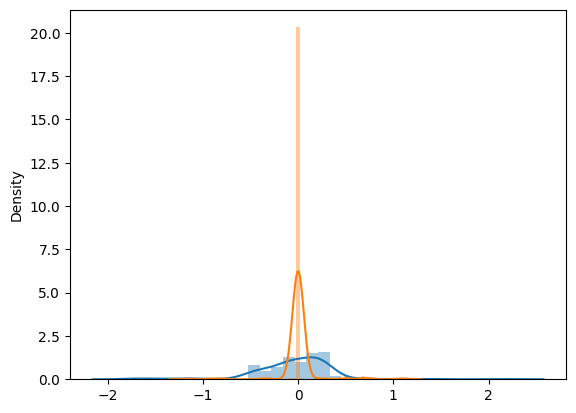

In [35]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [36]:
model1.get_weights()[0].reshape(256)

array([-5.07806957e-01, -3.69654894e-01,  2.83535749e-01,  1.18267737e-01,
       -4.42757308e-01,  1.40960976e-01,  2.43633181e-01,  2.37584919e-01,
        1.88842982e-01, -5.10304332e-01, -8.93950835e-02, -4.10871327e-01,
        3.36195171e-01,  3.07045698e-01, -3.24079484e-01,  2.60173380e-01,
        1.46824688e-01,  3.55154157e-01, -1.23445220e-01, -1.26449451e-01,
        2.89285839e-01, -2.27527186e-01,  2.78620750e-01, -2.17397198e-01,
       -1.60765037e-01, -2.16825902e-01, -2.44640589e-01,  2.48037815e-01,
       -3.49936515e-01,  1.50723875e-01,  1.10004194e-01, -1.61223696e-03,
       -3.72926682e-01,  2.36083880e-01, -4.71971966e-02, -9.64636803e-02,
       -1.73574820e-01, -3.73735040e-01,  4.24928330e-02,  1.43796429e-01,
        2.00914517e-01, -3.81114602e-01, -1.26650006e-01,  1.99084997e-01,
        2.96149760e-01, -5.13636112e-01,  2.60135949e-01,  2.28435352e-01,
       -6.46663070e-01, -4.59062964e-01, -1.83999047e-01,  2.78659642e-01,
       -1.44553751e-01,  